In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)
 
# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"
from keras.models import Sequential
from keras.layers import Dense
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import cross_val_score
# from sklearn.preprocessing import LabelEncoder
# from sklearn.model_selection import StratifiedKFold
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
# Common imports
import numpy as np
import pandas as pd
import os
import time 
# to make this notebook's output stable across runs
np.random.seed(42)
 
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
#Reading The Data File
PATH_TO_DATA ='/content/drive/MyDrive/Colab Notebooks/sonar.all-data'
df = pd.read_csv(PATH_TO_DATA,header=None)
Data=df.values
n=Data.shape[1]
# split into input (X) and output (Y) variables
#X = Data[:,0:60].astype(float)
X = Data[:,:n-1]
Y = Data[:,-1]
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y).astype(float)
XScaler = MinMaxScaler().fit(X);
X_new1  = XScaler.transform(X)

In [ ]:
from sklearn.decomposition import PCA
imput_numb=30   #This should be set
start1=time.time()
pca = PCA(n_components=imput_numb)
X_new=pca.fit_transform(X_new1)
end1=time.time()
PCA_time=end1-start1
print("PCA Time is :",PCA_time,'seconds')

PCA Time is : 0.01316070556640625 seconds


# Evaluating

In [ ]:
from sklearn import preprocessing
 #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X_new1)
df = pd.DataFrame(x_scaled)
Data1=df.values
# split into input (X) and output (Y) variables
X1 = Data1[:,:60]
y = encoded_Y.copy().reshape(-1,1)

Fold #1
Fold #2
Fold #3
Fold #4
Fold #5
training Time is : 11.925499677658081 seconds


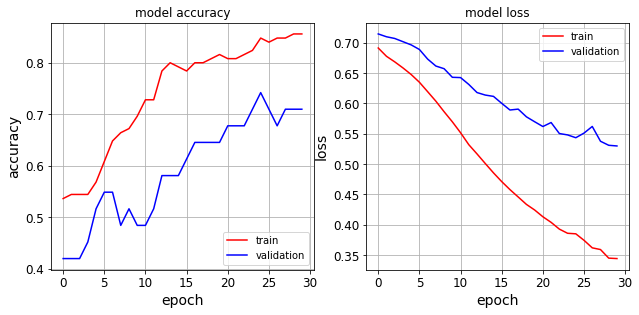

In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

X, X_test, y, y_test = train_test_split(X1, y, test_size=0.25, random_state=42) # first split Test and train 20% test

start2=time.time()
# Cross-Validate
kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
# oos_y = []
# oos_pred = []

fold = 0
for train, val in kf.split(X):
    fold+=1
    print(f"Fold #{fold}")
        
    x_train = X[train]
    y_train = y[train]
    x_val = X[val]
    y_val = y[val]

    # #tanh
    # model = Sequential()
    # model.add(Dense(20, activation='relu', input_shape=(60,)))	#Hidden Layer 1
    # model.add(Dense(512, activation='relu'))	#Hidden Layer 2
    # model.add(Dense(256, activation='relu'))	#Hidden Layer 3
    # model.add(Dense(1, activation='sigmoid')) #Last layer with one output per class
    # model.summary()


    
    model = Sequential()
    model.add(Dense(20, activation='relu', input_shape=(60,)))	#Hidden Layer 1
    model.add(Dense(256, activation='relu'))	#Hidden Layer 2
    model.add(Dense(1, activation='sigmoid')) #Last layer with one output per class
    # # model.summary()
 
    # model = Sequential()
    # model.add(Dense(100, activation='relu', input_shape=(60,)))	#Hidden Layer 1
    # model.add(Dense(1024, activation='relu'))	#Hidden Layer 2
    # model.add(Dense(1, activation='sigmoid')) #Last layer with one output per class

    opt='adam'
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 

    history=model.fit(x_train,y_train,validation_data=(x_val,y_val),verbose=0 ,epochs=30,batch_size=32)  #32 64 128

end2=time.time()
training_time1=end2-start2
print("training Time is :",training_time1,'seconds')
# Plotting Metrics
# Plot the Accuracy Curves
plt.figure(figsize=(16, 10))
plt.subplot(231)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
plt.subplot(232)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

2/2 [==============================] - 0s 7ms/step - loss: 0.3427 - accuracy: 0.8462
Test Loss 0.3427179455757141
Test Accuracy 0.8461538553237915
confusion matrix=
 [[24  6]
 [ 2 20]]
              precision    recall  f1-score   support

         0.0       0.92      0.80      0.86        30
         1.0       0.77      0.91      0.83        22

    accuracy                           0.85        52
   macro avg       0.85      0.85      0.85        52
weighted avg       0.86      0.85      0.85        52



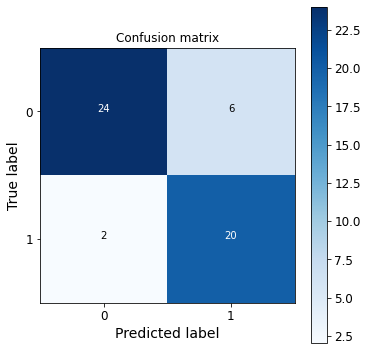

In [ ]:
# Prediction Labels
Y_pred = model.predict(X_test)


#Initial a threshhold for last layer
y_pred=np.zeros(len(Y_pred))
for i in range(len(y_pred)):
  if Y_pred[i]>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0


# Evaluate the trained model
[test_loss, test_acc] = model.evaluate(X_test, y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

# correct_indices = np.nonzero(y_pred == y_test)[0]
# incorrect_indices = np.nonzero(y_pred != y_test)[0]

# print(" classified correctly", len(correct_indices))
# print(" classified incorrectly", len(incorrect_indices))

from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n",confusion_mtx)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_mtx, class_names)    

print(classification_report(y_test,y_pred))

# Auto Encoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_new1, encoded_Y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
#Normalising The data
xScaler = MinMaxScaler().fit(X_train);
yScaler = MinMaxScaler().fit(y_train.reshape(-1, 1));
X_train = xScaler.transform(X_train)
X_test  = xScaler.transform(X_test)
X_val  = xScaler.transform(X_val)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
# y_val=y_val.reshape(-1,1)

import keras
from keras import layers

encoding_dim = imput_numb      # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# This is our input image
encoder_input = keras.Input(shape=(60,))
# "encoded" is the encoded representation of the input
encoded = layers.Dense(50, activation='relu')(encoder_input)
#Add a second hiden layer
encoded = layers.Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = layers.Dense(60, activation='sigmoid')(encoded)

# This model maps an input to its reconstruction
autoencoder = keras.Model(encoder_input, decoded)
encoder = keras.Model(encoder_input, encoded)

# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
#Trainig Time
start3=time.time()
autoencoder.fit(X_train, X_train,
                epochs=25,
                batch_size=50,
                validation_data=(X_val, X_val))
end3=time.time()
Encoding_time=end3-start3
print("Encoder Time is :",Encoding_time,'seconds')

Epoch 1/25
3/3 [==============================] - 1s 109ms/step - loss: 0.6921 - accuracy: 0.0452 - val_loss: 0.6882 - val_accuracy: 0.0588
Epoch 2/25
3/3 [==============================] - 0s 31ms/step - loss: 0.6859 - accuracy: 0.0427 - val_loss: 0.6834 - val_accuracy: 0.0588
Epoch 3/25
3/3 [==============================] - 0s 30ms/step - loss: 0.6798 - accuracy: 0.0502 - val_loss: 0.6792 - val_accuracy: 0.0588
Epoch 4/25
3/3 [==============================] - 0s 30ms/step - loss: 0.6752 - accuracy: 0.0402 - val_loss: 0.6748 - val_accuracy: 0.0588
Epoch 5/25
3/3 [==============================] - 0s 29ms/step - loss: 0.6696 - accuracy: 0.0452 - val_loss: 0.6701 - val_accuracy: 0.0588
Epoch 6/25
3/3 [==============================] - 0s 29ms/step - loss: 0.6649 - accuracy: 0.0402 - val_loss: 0.6651 - val_accuracy: 0.0588
Epoch 7/25
3/3 [==============================] - 0s 31ms/step - loss: 0.6588 - accuracy: 0.0427 - val_loss: 0.6601 - val_accuracy: 0.0294
Epoch 8/25
3/3 [==========

In [ ]:
X_test = encoder.predict(X_test)
X_train = encoder.predict(X_train)
X1=np.concatenate((X_train.T,X_test.T), axis=1).T

In [ ]:
# from sklearn.model_selection import KFold
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation

# X, X_test, y, y_test = train_test_split(X1, encoded_Y, test_size=0.25, random_state=42) # first split Test and train 25% test

# start4=time.time()
# # Cross-Validate
# kf = KFold(5, shuffle=True, random_state=42) # Use for KFold classification
    
# # oos_y = []
# # oos_pred = []

# fold = 0
# for train, val in kf.split(X):
#     fold+=1
#     print(f"Fold #{fold}")
        
#     x_train = X[train]
#     y_train = y[train]
#     x_val = X[val]
#     y_val = y[val]


    
#     model = Sequential()
#     model.add(Dense(20, activation='relu', input_shape=(30,)))	#Hidden Layer 1
#     model.add(Dense(256, activation='relu'))	#Hidden Layer 2
#     model.add(Dense(1, activation='sigmoid')) #Last layer with one output per class
#     # # model.summary()
 

#     opt='adam'
#     model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy']) 

#     history=model.fit(x_train,y_train,validation_data=(x_val,y_val),verbose=0 ,epochs=30,batch_size=32)  #32 64 128

# end4=time.time()
# training_time2=end4-start4
# print("training Time is :",training_time2,'seconds')
# # Plotting Metrics
# # Plot the Accuracy Curves
# plt.figure(figsize=(16, 10))
# plt.subplot(231)
# plt.plot(history.history['accuracy'],'r')
# plt.plot(history.history['val_accuracy'],'b')
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='lower right')
# plt.grid()

# # Plot the Loss Curves
# plt.subplot(232)
# plt.plot(history.history['loss'],'r')
# plt.plot(history.history['val_loss'],'b')
# plt.title('model loss')
# plt.ylabel('loss')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper right')
# plt.grid()

In [ ]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense

model1 = Sequential()
model1.add(Dense(imput_numb, activation='relu', input_shape=(imput_numb,)))	#Hidden Layer 1
model1.add(Dense(256, activation='relu'))	#Hidden Layer 2
model1.add(Dense(1, activation='sigmoid')) #Last layer with one output per class
model1.summary()


# Configure the Network
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_231 (Dense)            (None, 30)                930       
_________________________________________________________________
dense_232 (Dense)            (None, 256)               7936      
_________________________________________________________________
dense_233 (Dense)            (None, 1)                 257       
Total params: 9,123
Trainable params: 9,123
Non-trainable params: 0
_________________________________________________________________


In [ ]:
start4=time.time()
history = model1.fit(X_train, y_train, validation_data=(X_val,y_val) ,epochs=30, batch_size=32)
end4=time.time()
training_time2=end4-start4
print("training Time is :",training_time2,'seconds')

test_loss, test_acc = model1.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)
# Plotting Metrics
# Plot the Accuracy Curves
plt.figure(figsize=(16, 10))
plt.subplot(231)
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.grid()

# Plot the Loss Curves
plt.subplot(232)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.grid()

Epoch 1/30
1/5 [=====>........................] - ETA: 1s - loss: 0.7097 - accuracy: 0.5625

ValueError: ignored

In [ ]:
# Prediction Labels
Y_pred = model1.predict(X_test)


#Initial a threshhold for last layer
y_pred=np.zeros(len(Y_pred))
for i in range(len(y_pred)):
  if Y_pred[i]>0.5:
    y_pred[i]=1
  else:
    y_pred[i]=0


# Evaluate the trained model
[test_loss, test_acc] = model1.evaluate(X_test, y_test)
print("Test Loss", test_loss)
print("Test Accuracy", test_acc)

# correct_indices = np.nonzero(y_pred == y_test)[0]
# incorrect_indices = np.nonzero(y_pred != y_test)[0]

# print(" classified correctly", len(correct_indices))
# print(" classified incorrectly", len(incorrect_indices))

from sklearn.metrics import confusion_matrix , classification_report
# Confusion Matrix
class_names=[0,1]
confusion_mtx = confusion_matrix(y_test, y_pred)
print("confusion matrix=\n",confusion_mtx)

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize = (5,5))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(confusion_mtx, class_names)    

print(classification_report(y_test,y_pred))